# **K-MEANS ALGORITHM**
## **Heidy Mudita Sutedjo - 0706022310044**

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from matplotlib import pyplot as plt

## Dataset #1: Mess Personnel Dataset

In [47]:
data = {
    'Protein': [1.1, 8.2, 4.2, 1.5, 7.6, 2.0, 3.9],
    'Fat': [60, 20, 35, 21, 15, 55, 39]
}

df_mess = pd.DataFrame(data)
print(df_mess)

   Protein  Fat
0      1.1   60
1      8.2   20
2      4.2   35
3      1.5   21
4      7.6   15
5      2.0   55
6      3.9   39


In [48]:
# describe data
df_mess.describe()

,Protein,Fat
count,7.000000,7.00000
mean,4.071429,35.00000
std,2.865725,17.61628
min,1.100000,15.00000
25%,1.750000,20.50000
50%,3.900000,35.00000
75%,5.900000,47.00000
max,8.200000,60.00000


In [49]:
# Check for info dataset
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Protein  7 non-null      float64
 1   Fat      7 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


### Data Transformation

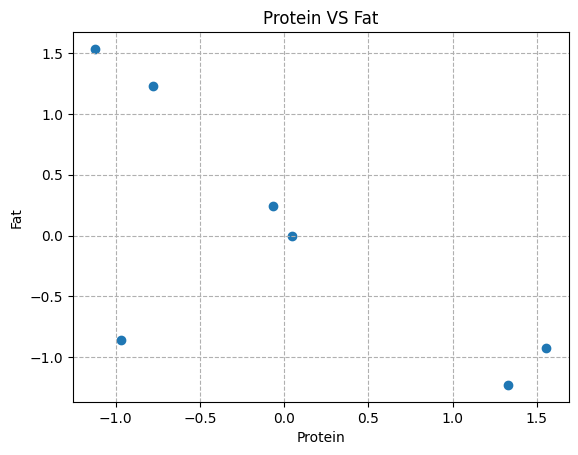

In [50]:
# Select the features to scale
features_to_scale = ['Protein', 'Fat']
df_to_scale = df_mess[features_to_scale]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the data and transform the data
df_mess_scaled = pd.DataFrame(sc.fit_transform(df_to_scale), columns=features_to_scale)

# visualizations of scaled data
plt.scatter(df_mess_scaled['Protein'], df_mess_scaled['Fat'])
plt.title('Protein VS Fat')
plt.xlabel('Protein')
plt.ylabel('Fat')
plt.grid(axis='both', linestyle='--')
plt.show()

### Choosing K

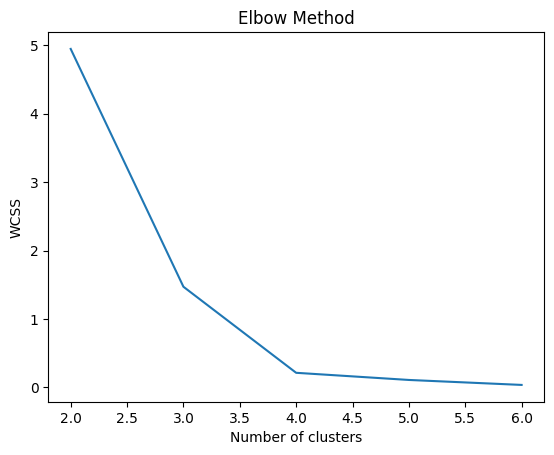

In [51]:
wcss = []
for i in range(2, 7):   #clusters 2-7
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_mess_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 7),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters      WCSS
0                   2  4.945770
1                   3  1.471002
2                   4  0.213559
3                   5  0.109032
4                   6  0.036468


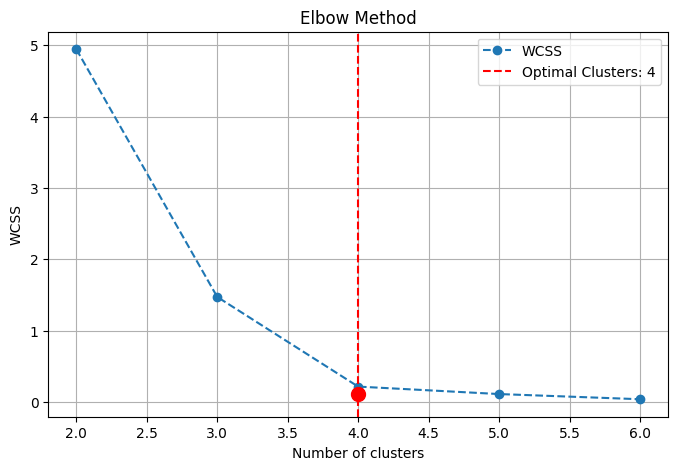

The optimal number of clusters is: 4


In [53]:
# Example WCSS values and cluster numbers
clusters = range(2, 7)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

### Modeling with K-Means

In [54]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_mess_scaled)

# Add the cluster labels to the DataFrame
df_mess['KMeans_Cluster'] = clusters

# Show the df
df_mess.head()

,Protein,Fat,KMeans_Cluster
0,1.1,60,2
1,8.2,20,1
2,4.2,35,3
3,1.5,21,0
4,7.6,15,1


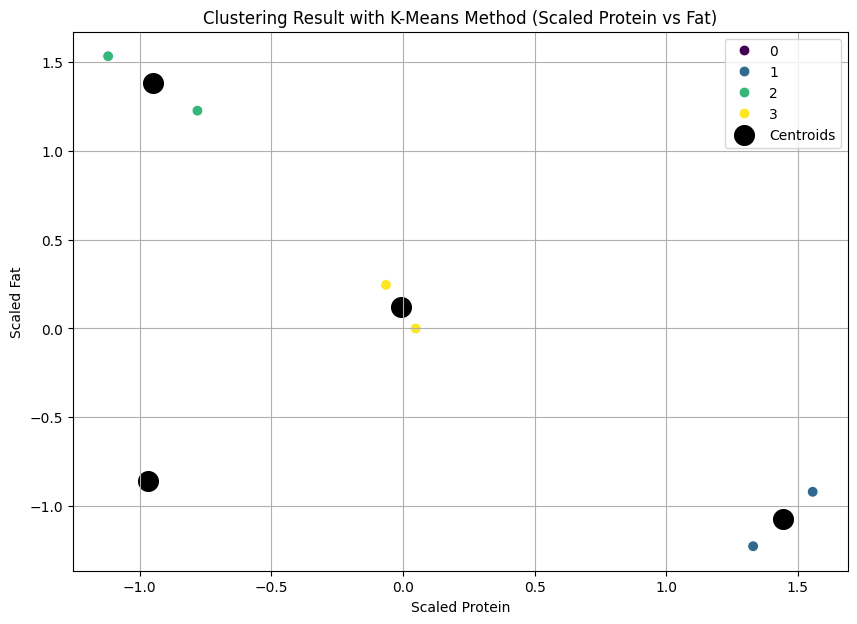

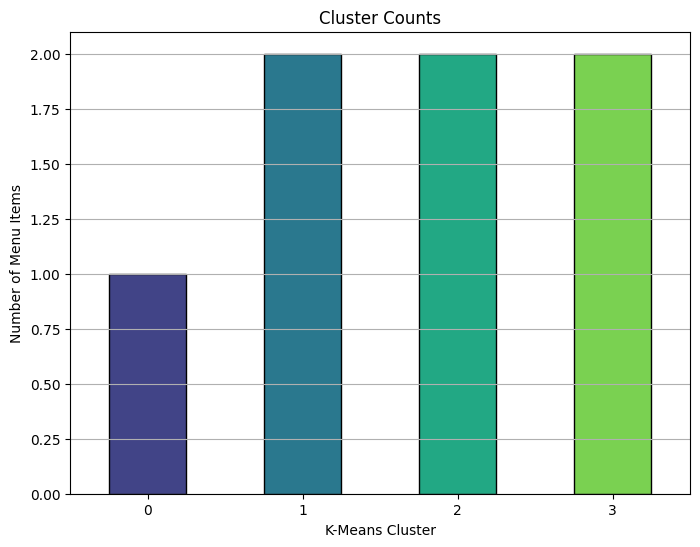

In [56]:
# Visualize clusters based on Scaled Annual Income and Scaled Spending Score (Scaled Data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_mess_scaled['Protein'], y=df_mess_scaled['Fat'], hue=df_mess['KMeans_Cluster'], palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Protein")
plt.ylabel("Scaled Fat")
plt.title("Clustering Result with K-Means Method (Scaled Protein vs Fat)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the count of customers in each cluster
cluster_counts = df_mess['KMeans_Cluster'].value_counts().sort_index() # Sort by index to match cluster order
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=sns.color_palette('viridis', len(cluster_counts)), edgecolor='black')
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Menu Items')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Dataset #2: Iris Dataset

In [57]:
# load dataset and show the first five sample
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df_iris = pd.read_csv(url)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
# describe data
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
# Check for info dataset
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Transformation

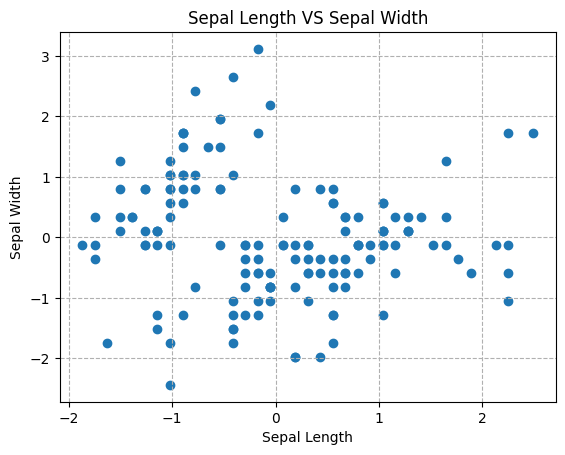

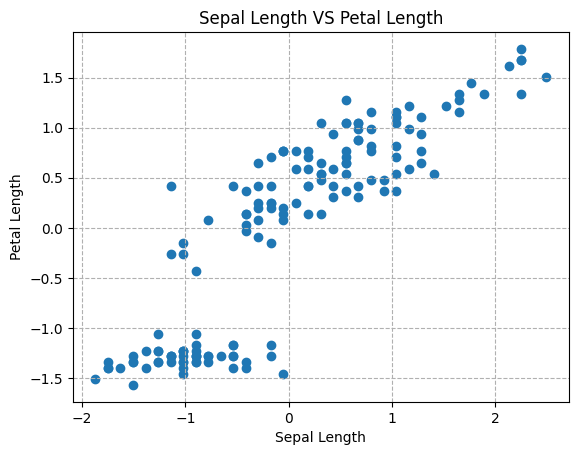

In [61]:
# Select the features to scale
features_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_to_scale = df_iris[features_to_scale]

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the scaler to the data and transform the data
df_iris_scaled = pd.DataFrame(sc.fit_transform(df_to_scale), columns=features_to_scale)

# visualizations of scaled data
plt.scatter(df_iris_scaled['sepal_length'], df_iris_scaled['sepal_width'])
plt.title('Sepal Length VS Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(axis='both', linestyle='--')
plt.show()

plt.scatter(df_iris_scaled['sepal_length'], df_iris_scaled['petal_length'])
plt.title('Sepal Length VS Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.grid(axis='both', linestyle='--')
plt.show()

### Choosing K

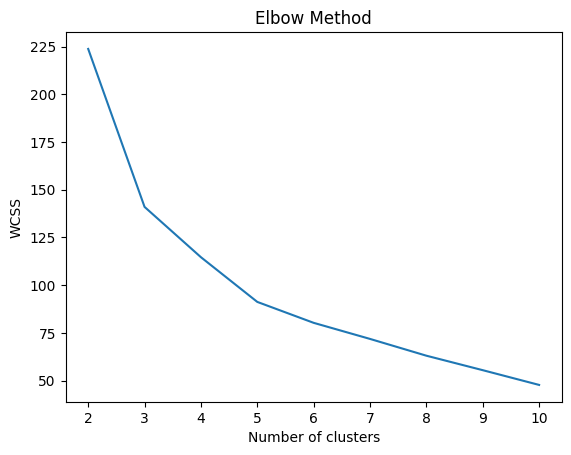

In [62]:
wcss = []
for i in range(2, 11):   #clusters 2-11
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_iris_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   2  223.732006
1                   3  140.965817
2                   4  114.615507
3                   5   91.191970
4                   6   80.230607
5                   7   71.801472
6                   8   63.012829
7                   9   55.427592
8                  10   47.702952


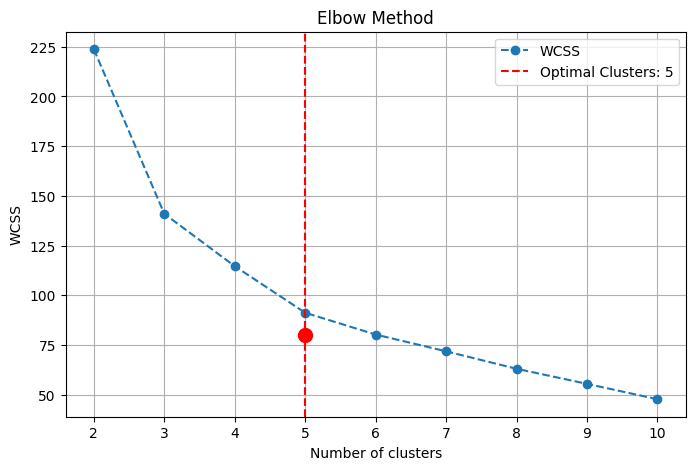

The optimal number of clusters is: 5


In [64]:
# Example WCSS values and cluster numbers
clusters = range(2, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

### Modeling with K-Means

In [65]:
# Fit K-Means to the data with the optimal number of K cluster = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_iris_scaled)

# Add the cluster labels to the DataFrame
df_iris['KMeans_Cluster'] = clusters

# Show the df
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,KMeans_Cluster
0,5.1,3.5,1.4,0.2,1.0,1
1,4.9,3.0,1.4,0.2,1.0,3
2,4.7,3.2,1.3,0.2,1.0,3
3,4.6,3.1,1.5,0.2,1.0,3
4,5.0,3.6,1.4,0.2,1.0,1


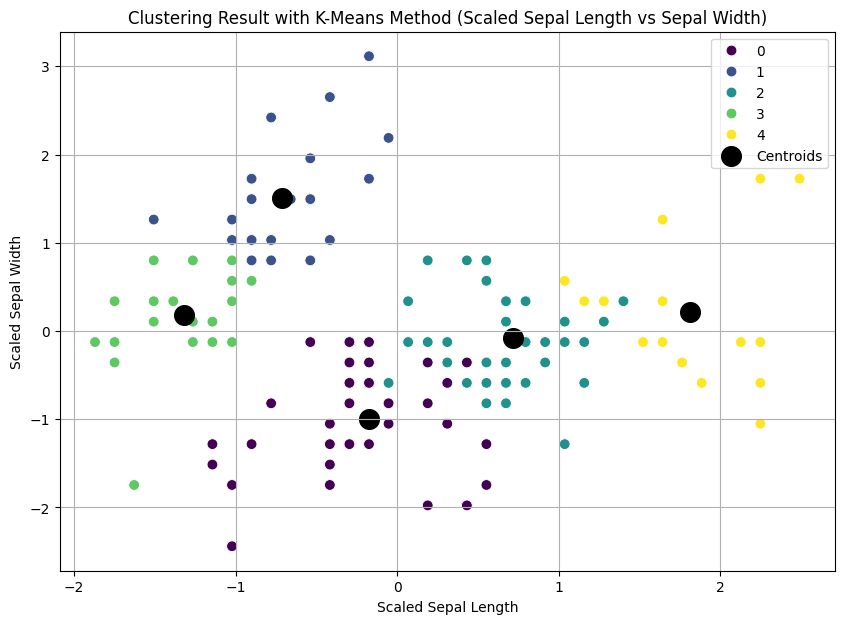

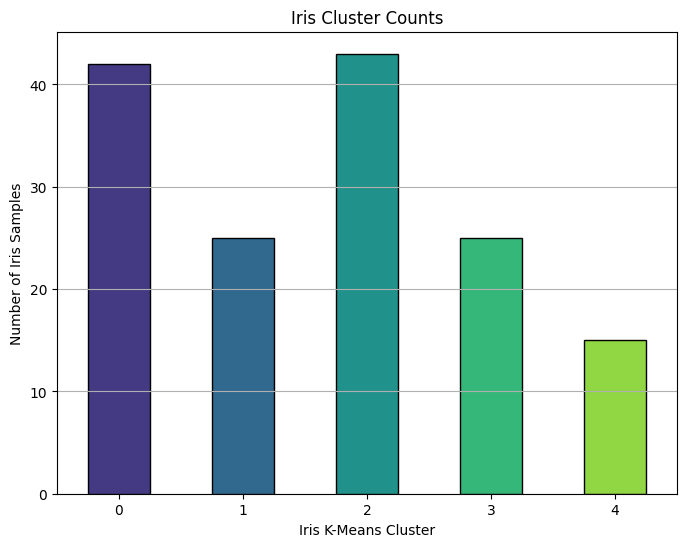

In [66]:
# Visualize clusters based on Scaled Annual Income and Scaled Spending Score (Scaled Data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_iris_scaled['sepal_length'], y=df_iris_scaled['sepal_width'], hue=df_iris['KMeans_Cluster'], palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.title("Clustering Result with K-Means Method (Scaled Sepal Length vs Sepal Width)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the count of customers in each cluster
cluster_counts = df_iris['KMeans_Cluster'].value_counts().sort_index() # Sort by index to match cluster order
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=sns.color_palette('viridis', len(cluster_counts)), edgecolor='black')
plt.title('Iris Cluster Counts')
plt.xlabel('Iris K-Means Cluster')
plt.ylabel('Number of Iris Samples')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

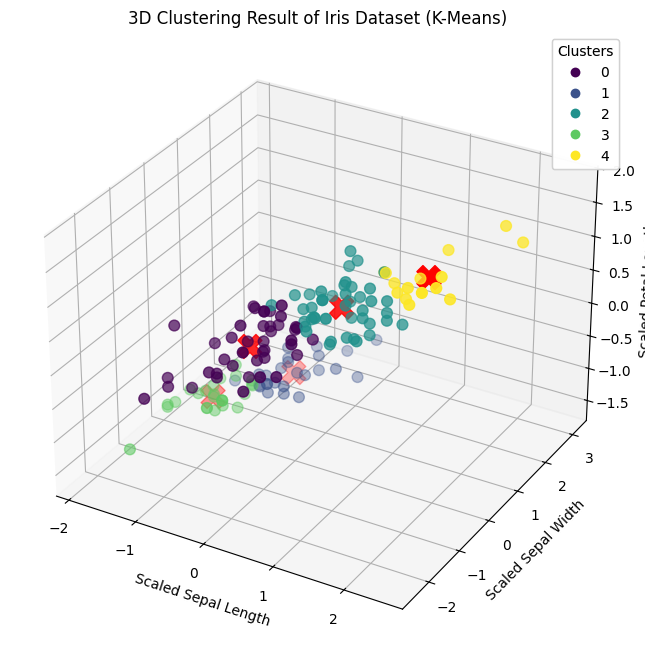

In [69]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot (using original scaled features for clarity in visualization)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points (using sepal_length, sepal_width, petal_length)
scatter = ax.scatter(df_iris_scaled['sepal_length'], df_iris_scaled['sepal_width'], df_iris_scaled['petal_length'],
                     c=df_iris['KMeans_Cluster'], cmap='viridis', s=60)

# Plot the cluster centroids (using the first three features)
centroids_scaled = kmeans.cluster_centers_[:, :3]
ax.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], centroids_scaled[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Scaled Sepal Length')
ax.set_ylabel('Scaled Sepal Width')
ax.set_zlabel('Scaled Petal Length')
ax.set_title('3D Clustering Result of Iris Dataset (K-Means)')

# Create a legend for clusters and centroids
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
# The second legend call is redundant if the first legend is for clusters
# ax.legend(['Centroids'], loc='upper left') # This line is often problematic when combined with legend_elements

plt.show()